In [3]:
from hfradar.src.radials import Radial
import glob
import os
import xarray as xr
import matplotlib.pyplot as plt

In [1]:
def concatenate_radials(radial_list, type=None, enhance=False):
    """
    This function takes a list of Radial objects or radial file paths and
    combines them along the time dimension using xarrays built-in concatenation
    routines.
    :param radial_list: list of radial files or Radial objects that you want to concatenate
    :return: radials concatenated into an xarray dataset by range, bearing, and time
    """
    type = type or 'multidimensional'

    radial_dict = {}
    for radial in radial_list:

        if not isinstance(radial, Radial):
            radial = Radial(radial)

        if type == 'multidimensional':
            radial_dict[radial.file_name] = radial.to_xarray_multidimensional(enhance=enhance)
        elif type == 'tabular':
            radial_dict[radial.file_name] = radial.to_xarray_tabular(enhance=enhance)

    ds = xr.concat(radial_dict.values(), 'time')
    return ds.sortby('time')



In [4]:
radial_dir = '/Users/mikesmith/Documents/work/ugos/new/qc/'

files = glob.glob(os.path.join(radial_dir, '*.ruv'))

In [5]:
files

['/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0300.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2020_01_03_0200.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2020_01_02_0200.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2020_01_04_2300.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2020_01_01_1400.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_30_1400.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_31_1400.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2020_01_04_0700.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2020_01_03_1900.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2020_01_02_1900.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_1800.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2020_01_01_1600.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2020_01_

In [6]:
ds = concatenate_radials(sorted(files), type='multidimensional', enhance=True)


/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


In [7]:
ds

<xarray.Dataset>
Dimensions:  (bearing: 360, range: 35, time: 165)
Coordinates:
  * range    (range) float64 11.65 17.47 23.3 29.12 ... 192.2 198.0 203.9 209.7
  * bearing  (bearing) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
  * time     (time) datetime64[ns] 2019-12-29 ... 2020-01-04T23:00:00
    lon      (time, range, bearing) float64 -80.98 -80.98 -80.98 ... nan nan nan
    lat      (time, range, bearing) float64 24.84 24.84 24.84 ... nan nan nan
Data variables:
    VELU     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    VELV     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    VFLG     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    ESPC     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    ETMP     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    MAXV     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    MINV     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    ERSC     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    ERTC     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    XDST     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    YDST     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    VELO     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    HEAD     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    SPRC     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    QC06     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    QC07     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    QC08     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    QC09     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    QC10     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    QC11     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    QCOP     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan
    PRIM     (time, range, bearing) float32 nan nan nan nan ... nan nan nan nan

In [9]:
ds.VELU

<xarray.DataArray 'VELU' (time: 165, range: 35, bearing: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * range    (range) float64 11.65 17.47 23.3 29.12 ... 192.2 198.0 203.9 209.7
  * bearing  (bearing) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
  * time     (time) datetime64[ns] 2019-12-29 ... 2020-01-04T23:00:00
    lon      (time, range, bearing) float64 -80.98 -80.98 -80.98 ... nan nan nan
    lat      (time, range, bearing) float64 24.84 24.84 24.84 ... nan nan nan

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

# Isais
tds = ds.sel(bearing=slice(177, 180), range=slice(85, 100))


In [11]:
tds

<xarray.Dataset>
Dimensions:  (bearing: 4, range: 3, time: 165)
Coordinates:
  * range    (range) float64 87.37 93.2 99.02
  * bearing  (bearing) float64 177.0 178.0 179.0 180.0
  * time     (time) datetime64[ns] 2019-12-29 ... 2020-01-04T23:00:00
    lon      (time, range, bearing) float64 -80.94 -80.95 ... -80.97 -80.98
    lat      (time, range, bearing) float64 23.96 23.95 23.95 ... 23.85 23.85
Data variables:
    VELU     (time, range, bearing) float32 -1.752 nan nan nan ... nan nan nan
    VELV     (time, range, bearing) float32 33.64 nan nan nan ... nan nan nan
    VFLG     (time, range, bearing) float32 0.0 nan nan nan ... 0.0 nan nan nan
    ESPC     (time, range, bearing) float32 62.171 nan nan nan ... nan nan nan
    ETMP     (time, range, bearing) float32 13.15 nan nan nan ... nan nan nan
    MAXV     (time, range, bearing) float32 -112.13 nan nan nan ... nan nan nan
    MINV     (time, range, bearing) float32 50.821 nan nan nan ... nan nan nan
    ERSC     (time, range, bearing) float32 4.0 nan nan nan ... 2.0 nan nan nan
    ERTC     (time, range, bearing) float32 6.0 nan nan nan ... 4.0 nan nan nan
    XDST     (time, range, bearing) float32 4.5728 nan nan nan ... nan nan nan
    YDST     (time, range, bearing) float32 -87.2538 nan nan nan ... nan nan nan
    VELO     (time, range, bearing) float32 -33.686 nan nan nan ... nan nan nan
    HEAD     (time, range, bearing) float32 357.0 nan nan nan ... nan nan nan
    SPRC     (time, range, bearing) float32 15.0 nan nan nan ... nan nan nan
    QC06     (time, range, bearing) float32 1.0 nan nan nan ... 1.0 nan nan nan
    QC07     (time, range, bearing) float32 1.0 nan nan nan ... 1.0 nan nan nan
    QC08     (time, range, bearing) float32 1.0 nan nan nan ... 1.0 nan nan nan
    QC09     (time, range, bearing) float32 1.0 nan nan nan ... 1.0 nan nan nan
    QC10     (time, range, bearing) float32 1.0 nan nan nan ... 1.0 nan nan nan
    QC11     (time, range, bearing) float32 1.0 nan nan nan ... 1.0 nan nan nan
    QCOP     (time, range, bearing) float32 1.0 nan nan nan ... 1.0 nan nan nan
    PRIM     (time, range, bearing) float32 1.0 nan nan nan ... 1.0 nan nan nan

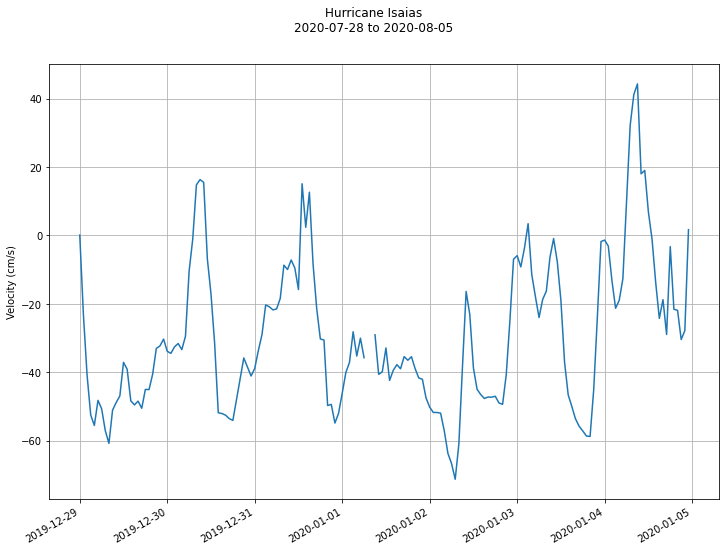

In [12]:
# Mean of area
mean = tds.mean(dim=('bearing', 'range'))
mean.VELO.plot()
plt.grid()
# axes[0].set_ylim([-7, 7])
plt.xlabel('')
plt.ylabel('Velocity (cm/s)')
plt.suptitle('Hurricane Isaias\n2020-07-28 to 2020-08-05')
plt.show()

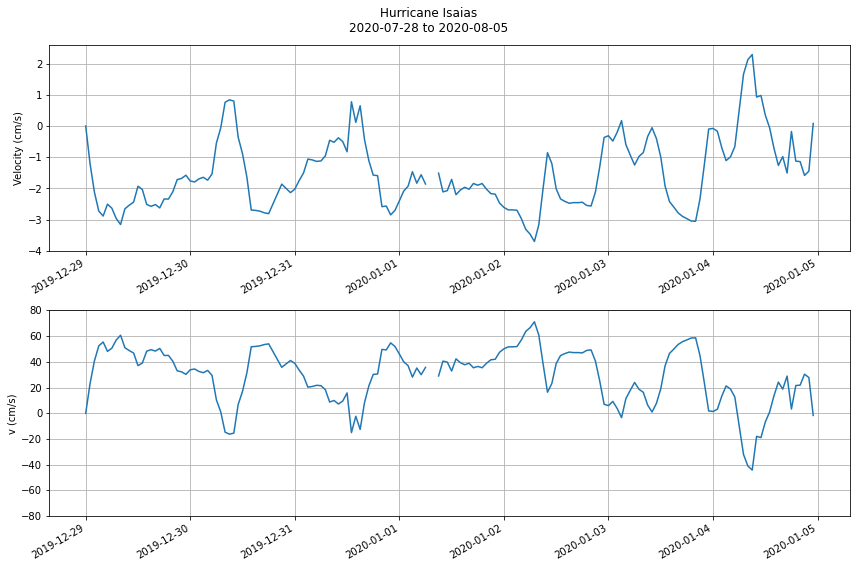

In [13]:
# Mean of area
mean = tds.mean(dim=('bearing', 'range'))

fig, axes = plt.subplots(nrows=2)
plt.suptitle('Hurricane Isaias\n2020-07-28 to 2020-08-05')

mean.VELU.plot(ax=axes[0])
axes[0].grid()
# axes[0].set_ylim([-7, 7])
axes[0].set_xlabel('')
axes[0].set_ylabel('Velocity (cm/s)')

mean.VELV.plot(ax=axes[1])
axes[1].grid()
axes[1].set_ylim([-80, 80])
axes[1].set_ylabel('v (cm/s)')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()
# plt.savefig('/Users/mikesmith/Desktop/isaias-mean.png', dpi=300, bbox_inches='tight', pad_inches=0.1)


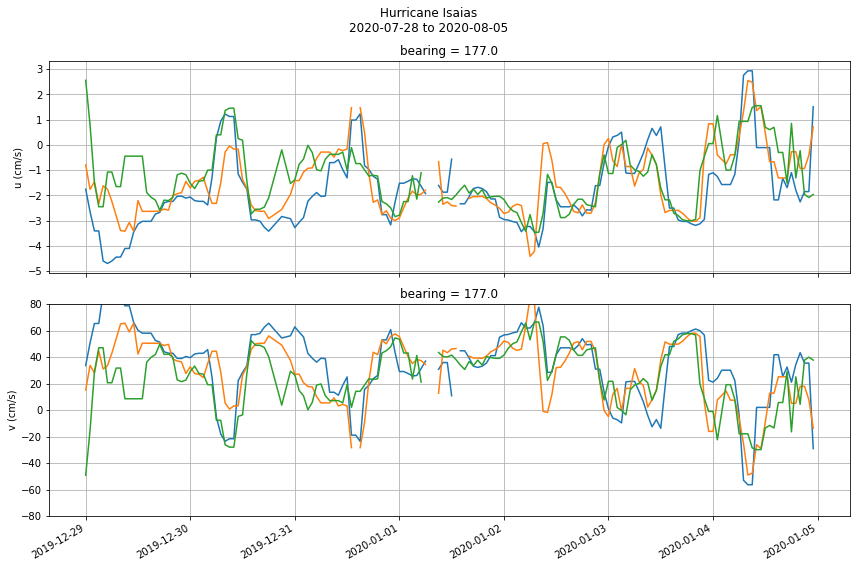

In [14]:
# Single bearing bin, multiple ranges
bearing = tds.isel(bearing=0)

fig, axes = plt.subplots(nrows=2, sharex=True)
bearing.VELU.plot.line(x='time', ax=axes[0], add_legend=False)
axes[0].grid()
# axes[0].set_ylim([-7, 7])
axes[0].set_ylabel('u (cm/s)')
axes[0].set_xlabel('')

bearing.VELV.plot.line(x='time', ax=axes[1], add_legend=False)
axes[1].grid()
axes[1].set_ylim([-80, 80])
axes[1].set_ylabel('v (cm/s)')
axes[1].set_xlabel('')
# axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.suptitle(f'Hurricane Isaias\n2020-07-28 to 2020-08-05')

plt.tight_layout()
plt.show()
# plt.savefig('/Users/mikesmith/Desktop/isaias-split.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

